In [32]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split

In [33]:
# loading training and testing sets
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

EDA

In [34]:
print("df_train.shape : " , df_train.shape)
print("*"*50)
print("df_test.shape  : " , df_test.shape)

df_train.shape :  (1460, 81)
**************************************************
df_test.shape  :  (1459, 80)


Skewness: 1.882876
Kurtosis: 6.536282


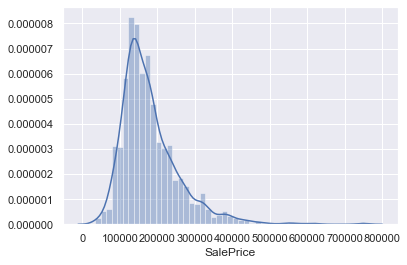

In [35]:
sns.distplot(df_train['SalePrice']);
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [36]:
# dropping the column "Id" since it is not useful for predicting SalePrice
df_train.drop('Id',axis=1,inplace=True )
id_test = df_test['Id']                      # for submissions
df_test.drop('Id',axis=1,inplace=True )
df_train.describe().transpose()
# For the numerical columns, only three have missing values: LotFrontage, MasVnrArea and GarageYrBlt.

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

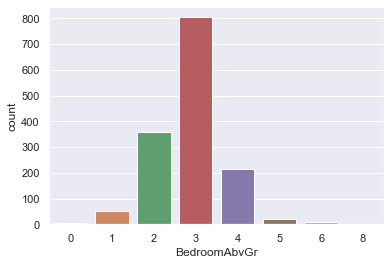

In [38]:
# An assumption that the number of bedrooms in a house could have an impact in the sales price. 
# So the distribution the number of rooms availables per each house.

sns.countplot(df_train.BedroomAbvGr)

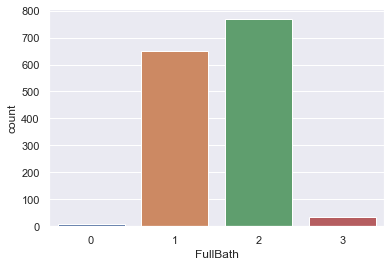

In [39]:
sns.countplot(df_train.FullBath )

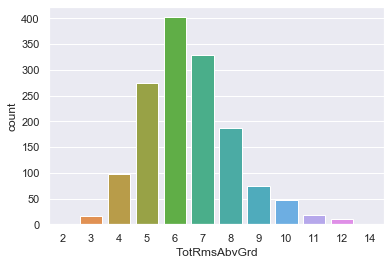

In [40]:
# Here because most houses have 3 bedrooms we expect each house to have 6 total rooms (3 bedrooms + a kitchen + living room
# + dining room)
sns.countplot(df_train.TotRmsAbvGrd)

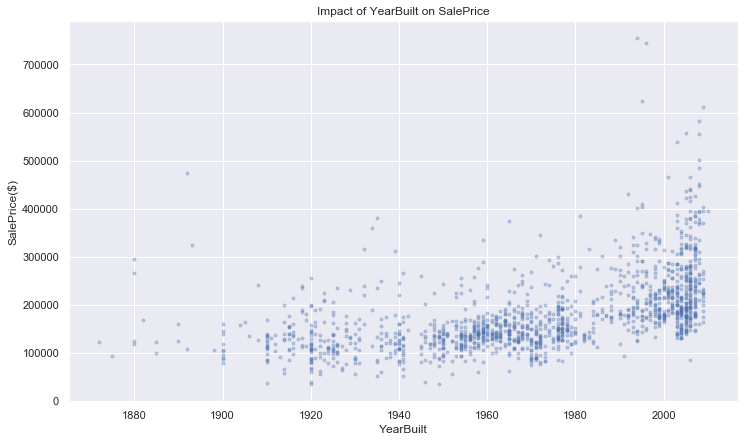

In [41]:
# Next I wanted to explore if there was an impact on sales prices by year
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice($)")
plt.title("Impact of YearBuilt on SalePrice")
plt.plot(df_train.YearBuilt, df_train.SalePrice ,'.', alpha = 0.3)

In [42]:
TotRmsAbvGrd = df_train.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
TotRmsAbvGrd

,SalePrice
TotRmsAbvGrd,
2,39300.0
3,100000.0
4,120500.0
5,130250.0
6,155000.0
7,184100.0
8,200000.0
9,252000.0
10,285000.0


In [43]:
Bedrooms_pivot = df_train.pivot_table(index='BedroomAbvGr', values='SalePrice', aggfunc=np.median)
Bedrooms_pivot

,SalePrice
BedroomAbvGr,
0,202500
1,145250
2,137250
3,169945
4,193500
5,161500
6,141000
8,200000


In [44]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
1,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,141000
2,20,RL,NaN,8475,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,135750
3,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
4,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000


In [45]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print("*"*100)
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print("*"*100)
print(df_train[numerical_feats].columns)
numerical_columns = df_train.select_dtypes(exclude=['object']).columns.tolist()
print("*"*100)
print(df_train[categorical_feats].columns)

Number of Numerical features:  37
****************************************************************************************************
Number of Categorical features:  43
****************************************************************************************************
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley

In [46]:
# start dealing with missing values where it makes sense 
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
df_train["Alley"] = df_train["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
df_train["Fence"] = df_train["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
    
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_train = df_train.drop(['Utilities'], axis=1)

# Functional : data description says NA means typical
df_train["Functional"] = df_train["Functional"].fillna("Typ")

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")




In [47]:
# start dealing with missing values where it makes sense 
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

df_test["PoolQC"] = df_test["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
df_test["Alley"] = df_test["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
df_test["Fence"] = df_test["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_test[col] = df_test[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_test[col] = df_test[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_test[col] = df_test[col].fillna('None')
    
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_test = df_test.drop(['Utilities'], axis=1)

# Functional : data description says NA means typical
df_test["Functional"] = df_test["Functional"].fillna("Typ")

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_test['MSSubClass'] = df_test['MSSubClass'].fillna("None")




In [48]:
## Dropping Colummns with Null Values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


In [49]:
#not dealing with missing values 
x = list(missing_data[missing_data['Total'] > 0].index)
df_train.drop(x,axis=1,inplace=True )
df_test.drop(x,axis=1,inplace=True )

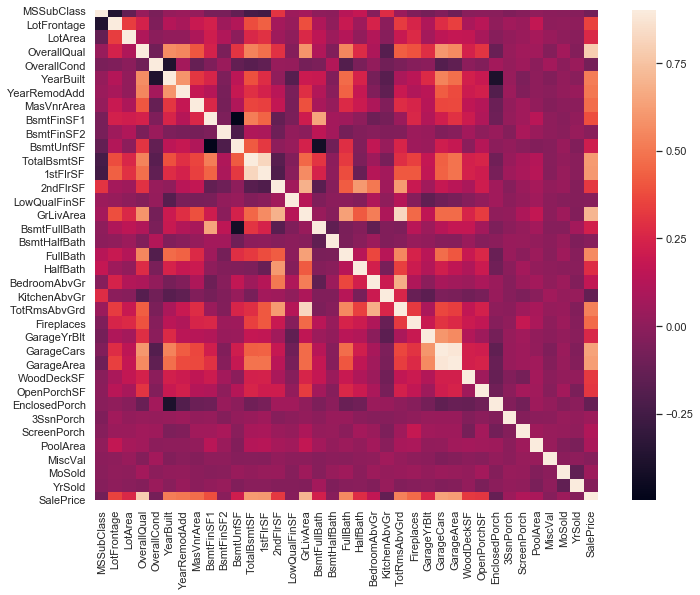

In [50]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [51]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

# Adding total sqfootage feature 
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [52]:
from sklearn.preprocessing import LabelEncoder
cols = ('MSZoning', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, appliy LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))
    lbl.fit(list(df_test[c].values)) 
    df_test[c] = lbl.transform(list(df_test[c].values))

# shape        
print('Shape df_train: {}'.format(df_train.shape))

# shape        
print('Shape df_test: {}'.format(df_train.shape))

Shape df_train: (1460, 80)
Shape df_test: (1460, 80)


In [53]:
df_train.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [54]:
# Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of 
# the predicted value and the logarithm of the observed sales price. 
# (Taking logs means that errors in predicting expensive houses and cheap houses will 
# affect the result equally.)

In [55]:
y = df_train[['SalePrice']]
df_train.drop('SalePrice',axis=1,inplace=True )
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [57]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
1016,13,3,73.0,12122,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,9,2,WD,Normal,1943
328,9,3,65.0,8068,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,3,3,ConLI,Normal,3277
295,8,3,60.0,10410,1,1,3,Lvl,Inside,0,...,0,3,2,None,0,10,3,WD,Normal,2172
1459,4,3,75.0,9937,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,8,2,WD,Normal,2512
466,9,3,65.0,8200,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,9,1,WD,Normal,2775


In [58]:
# use cross-validation and print the scores for each
reg = LinearRegression()
# cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
# print(cv_scores)

# define the model
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_train)

# creating the submission file
# my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice':predictions})
#my_submission.to_csv('submission.csv', index=False)


ValueError: could not convert string to float: 'Lvl'